In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyBigWig as pbw
import tmpPypkg.globalvar as gv


In [2]:
%matplotlib inline 

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Configuration

In [4]:
projd = gv.pt_projd
peakd = os.path.join(projd, "data", "pairedtag_peak")
ptDNAsa2d = os.path.join(projd, "data", "pairedtag_ann")
ptbigwigd = os.path.join(projd, "data", "ptDNAbam", "bigwig")
pt_27me3on4me1d = os.path.join(peakd, "H3K27me3_H3K4me1")

# Load Meta Data

In [3]:
ptcellmeta = gv.getPairedTagCellMeta()

# Load Paired Tag Histone modificaitons SnapATAC2 AnnData

In [144]:
# H3K4me1_ann: ad.AnnData = sa2.read(os.path.join(ptDNAsa2d, "2024701.brain.snapatac2.h3k4me1.h5ad"), backed = None)
# H3K27me3_ann: ad.AnnData = sa2.read(os.path.join(ptDNAsa2d, "20240821.ambPT.snapatac2.h3k27me3.10kbin.h5ad"), backed=None)

In [22]:
H3K4me1_ann

AnnData object with n_obs × n_vars = 722087 × 492558
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'leiden', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'brainregion', 'modality', 'oriBarcode', 'sublib', 'sex', 'rep', 'exp', 'L1UMAP1', 'L1UMAP2', 'L1', 'L2', 'L1_2', 'sample.sex', 'sample.rep', 'sample.region.name', 'sample.region.major', 'mapping.nRNA', 'mapping.nDNA', 'maping.prcntMT', 'mappiing.prcntMouseReads', 'doublet.score', 'doublet.prob', 'doublet.isdlt', 'cluster.l1.id', 'cluster.l1.umap.x', 'cluster.l1.umap.y', 'cluster.l2.id', 'cluster.l2.umap.x', 'cluster.l2.umap.y', 'cluster.l3.id', 'cluster.l3.umap.x', 'cluster.l3.umap.y', 'cluster.l4.id', 'cluster.l4.umap.x', 'cluster.l4.umap.y', 'cluster.l5.id', 'cluster.l5.umap.x', 'cluster.l5.umap.y', 'exp', 'exp.sublib', 'exp.modularity', 'isNeuL1', 'l5r', 'pairedtagCluster', 'regionUMAP.x', 'regionUMAP.y', 'gannot.cl', 'gannot.sp', 'rannot.cl', 'rannot.sp', 'annot.sp', 'annot.sc', 'annot.c', 'annotQuality', 'cellular_barco

In [23]:
H3K27me3_ann

AnnData object with n_obs × n_vars = 799417 × 246285
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'leiden', 'sample.sex', 'sample.rep', 'sample.region.name', 'sample.region.major', 'mapping.nRNA', 'mapping.nDNA', 'maping.prcntMT', 'mappiing.prcntMouseReads', 'doublet.score', 'doublet.prob', 'doublet.isdlt', 'cluster.l1.id', 'cluster.l1.umap.x', 'cluster.l1.umap.y', 'cluster.l2.id', 'cluster.l2.umap.x', 'cluster.l2.umap.y', 'cluster.l3.id', 'cluster.l3.umap.x', 'cluster.l3.umap.y', 'cluster.l4.id', 'cluster.l4.umap.x', 'cluster.l4.umap.y', 'cluster.l5.id', 'cluster.l5.umap.x', 'cluster.l5.umap.y', 'exp', 'exp.sublib', 'exp.modularity', 'isNeuL1', 'l5r', 'pairedtagCluster', 'regionUMAP.x', 'regionUMAP.y', 'gannot.cl', 'gannot.sp', 'rannot.cl', 'rannot.sp', 'annot.sp', 'annot.sc', 'annot.c', 'annotQuality', 'cellular_barcode'
    var: 'count', 'selected'
    uns: 'annot.c_colors', 'reference_sequences', 'spectral_eigenvalue'
    obsm: 'X_spectral', 'X_umap', 'fragment_single'
 

In [43]:
type(H3K4me1_ann.obs)

pandas.core.frame.DataFrame

# Use one subclass as an example to test H3K27me3 CPM on H3K4me1 peaks

In [64]:
sc = "1179_OPC_NN_1"

In [57]:
bw_h3k27me3 = pbw.open(os.path.join(ptbigwigd, f"{sc}.H3K27me3.e100.bs100.sm300.bw"))

In [71]:
bw_h3k27me3.chroms()

{'chr1': 195471971,
 'chr2': 182113224,
 'chr3': 160039680,
 'chr4': 156508116,
 'chr5': 151834684,
 'chr6': 149736546,
 'chr7': 145441459,
 'chr8': 129401213,
 'chr9': 124595110,
 'chr10': 130694993,
 'chr11': 122082543,
 'chr12': 120129022,
 'chr13': 120421639,
 'chr14': 124902244,
 'chr15': 104043685,
 'chr16': 98207768,
 'chr17': 94987271,
 'chr18': 90702639,
 'chr19': 61431566,
 'chrX': 171031299,
 'chrY': 91744698,
 'chrM': 16299,
 'chr1_GL456210_random': 169725,
 'chr1_GL456211_random': 241735,
 'chr1_GL456212_random': 153618,
 'chr1_GL456213_random': 39340,
 'chr1_GL456221_random': 206961,
 'chr4_GL456216_random': 66673,
 'chr4_GL456350_random': 227966,
 'chr4_JH584292_random': 14945,
 'chr4_JH584293_random': 207968,
 'chr4_JH584294_random': 191905,
 'chr4_JH584295_random': 1976,
 'chr5_GL456354_random': 195993,
 'chr5_JH584296_random': 199368,
 'chr5_JH584297_random': 205776,
 'chr5_JH584298_random': 184189,
 'chr5_JH584299_random': 953012,
 'chr7_GL456219_random': 175968,
 'c

In [67]:
peak_h3k4me1 = pd.read_csv(os.path.join(peakd, "subclass_peak", f"{sc}-H3K4me1.bedtoolmerge.peak"),
                          header=0, sep = "\t")

In [70]:
peak_h3k4me1

,chrom,startFrom,endTo,name,int10Neglog10qval,strand,foldChangeAtSummit,neglog10pval,neglog10qval,relaSummit,ScorePerMillion
0,chr1,3094385,3095629,1179_OPC_NN_1-H3K4me1-Female_peak_2,89,.,4.44327,10.35810,8.96617,-1,3.959586
1,chr1,3121859,3122112,1179_OPC_NN_1-H3K4me1-Male_peak_2,55,.,3.52177,6.80558,5.54516,-1,2.446935
2,chr1,3210570,3211047,1179_OPC_NN_1-H3K4me1-Male_peak_3,51,.,3.43044,6.38274,5.13196,-1,2.268976
3,chr1,3212203,3214221,1179_OPC_NN_1-H3K4me1-Female_peak_5,52,.,3.87970,6.64568,5.28509,-1,3.258192
4,chr1,3214851,3218090,1179_OPC_NN_1-H3K4me1-Male_peak_5,68,.,3.64449,8.05358,6.80150,-1,3.025302
...,...,...,...,...,...,...,...,...,...,...,...
170254,chrY,1010248,1010686,1179_OPC_NN_1-H3K4me1-Male_peak_284554,49,.,3.31733,6.19733,4.97316,-1,2.179997
170255,chrY,1207743,1207985,1179_OPC_NN_1-H3K4me1-Male_peak_284556,149,.,5.83542,16.55420,14.99610,-1,6.628970
170256,chrY,1245427,1245949,1179_OPC_NN_1-H3K4me1-Male_peak_284559,85,.,4.21909,9.92967,8.58709,-1,3.781627
170257,chrY,2088955,2089155,1179_OPC_NN_1-H3K4me1-Female_peak_308183,393,.,12.73710,41.72990,39.34570,-1,24.624412


In [73]:
bw_h3k27me3.stats("chr1", 3094385, 3095629)

[0.8411116388737198]

In [76]:
?bw_h3k27me3.stats
type(bw_h3k27me3)

pyBigWig.bigWigFile

Docstring:
Return summary statistics for a given range. On error, this function throws a
runtime exception.

Positional arguments:
    chr:   Chromosome name

Keyword arguments:
    start: Starting position
    end:   Ending position
    type:  Summary type (mean, min, max, coverage, std, sum), default 'mean'.
    nBins: Number of bins into which the range should be divided before
           computing summary statistics. The default is 1.
    exact: By default, pyBigWig uses the same method as Kent's tools from UCSC
           for computing statistics. This means that 'zoom levels' may be
           used, rather than actual values (please see the pyBigWig repository
           on github for further information on this). To avoid this behaviour,
           simply specify 'exact=True'. Note that values returned will then
           differ from what UCSC, IGV, and similar other tools will report.

>>> import pyBigWig
>>> bw = pyBigWig.open("test/test.bw")
>>> bw.stats("1", 0, 3)
[0.200000

In [82]:
def calH3K27me3Signals(bw, dfrow) -> float:
    r = bw.stats(
        dfrow['chrom'], dfrow['startFrom'], dfrow['endTo'], 
        type = "mean", exact = True
    )
    return(r)

In [91]:
s = peak_h3k4me1.apply(lambda x: calH3K27me3Signals(bw_h3k27me3, x), axis = 1)

In [98]:
ss = s.apply(lambda x: x[0])
ss

0         0.841112
1         3.773010
2         0.355954
3         0.115171
4         0.559491
            ...   
170254    0.997332
170255    0.313749
170256    0.004677
170257    0.000000
170258    0.000000
Length: 170259, dtype: float64

In [104]:
peak_h3k4me1.drop("H3K27me3Avg", axis = 1, inplace=True)
peak_h3k4me1.insert(3, 'H3K27me3Avg', ss)

In [105]:
peak_h3k4me1.to_csv(os.path.join(pt_27me3on4me1d, f"{sc}.onsite.exact.csv"), 
                   sep=",", header=True, index=False)

# Draw Figures

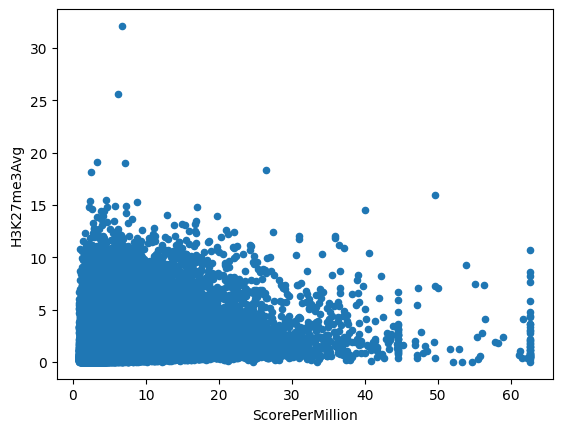

In [116]:
ax = peak_h3k4me1.plot.scatter(x = 'ScorePerMillion', y = "H3K27me3Avg")

In [120]:
a = peak_h3k4me1.sort_values(by = 'H3K27me3Avg')
a

,chrom,startFrom,endTo,H3K27me3Avg,name,int10Neglog10qval,strand,foldChangeAtSummit,neglog10pval,neglog10qval,relaSummit,ScorePerMillion
43529,chr4,133324556,133324809,0.000000,1179_OPC_NN_1-H3K4me1-Female_peak_209765,57,.,4.09862,7.19117,5.79027,-1,3.571480
9879,chr1,165415939,165416139,0.000000,1179_OPC_NN_1-H3K4me1-Female_peak_17906,88,.,5.19881,10.47190,8.89806,-1,5.513863
162322,chr19,5126574,5126775,0.000000,1179_OPC_NN_1-H3K4me1-Female_peak_146259,975,.,21.97980,100.29400,97.59060,-1,54.700030
120073,chr12,115562937,115563137,0.000000,1179_OPC_NN_1-H3K4me1-Female_peak_69940,161,.,7.27833,17.95290,16.11610,-1,10.087863
73191,chr7,113914785,113915066,0.000000,1179_OPC_NN_1-H3K4me1-Female_peak_262832,68,.,3.95147,8.15032,6.83757,-1,3.446165
...,...,...,...,...,...,...,...,...,...,...,...,...
35312,chr4,3938113,3939751,18.334461,1179_OPC_NN_1-H3K4me1-Female_peak_195166,529,.,12.39880,54.91490,52.96020,-1,26.441480
52113,chr5,104330655,104332528,18.988659,1179_OPC_NN_1-H3K4me1-Male_peak_208914,141,.,5.69754,15.61750,14.11880,-1,7.142959
103518,chr11,17486231,17486952,19.133019,1179_OPC_NN_1-H3K4me1-Female_peak_40103,73,.,4.05868,8.72303,7.38027,-1,3.247751
100167,chr10,93625186,93626436,25.548394,1179_OPC_NN_1-H3K4me1-Female_peak_34030,98,.,5.21298,11.41530,9.88258,-1,6.140439


In [125]:
a.insert(0, 'int_index', range(0, a.shape[0]))

<Axes: xlabel='int_index', ylabel='H3K27me3Avg'>

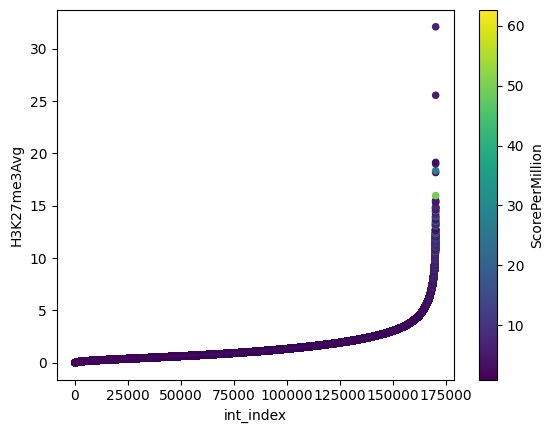

In [129]:
a.plot.scatter(x = 'int_index', y = 'H3K27me3Avg', c= 'ScorePerMillion', colormap = 'viridis')

In [143]:
np.quantile(a.H3K27me3Avg, 0.995)
v = a.H3K27me3Avg[a.H3K27me3Avg <= np.quantile(a.H3K27me3Avg, 0.995)]
v.shape
a.shape
m = np.mean(v)
sd = np.std(v)
m
sd
m + 2*sd
(a.H3K27me3Avg >= m + 2*sd).sum()

8.41470101691251

(169407,)

(170259, 13)

1.4870719989487475

1.3348361969476958

4.156744392844139

9655

# Plot 326_OPC signals

## H3K27me3 on H3K4me1 